# Lab 13: Eigenvectors and eigenvalues

We've already begun to look at how to use numpy `array`s to represent mathematical matrices. In this lab, we'll see some further examples of how matrices are useful in scientific programming: specifically, the important role that the *eigenvectors* and *eigenvalues* of these matrices play. Actually, this sort of analysis is central to disciplines ranging from economics to engineering; here we'll just consider two examples, from physics and ecology.

In [2]:
# Once again we start by importing some standard helper functions:

from numpy import array, vstack, hstack
from numpy.linalg import eig

## A quick reminder: working with multidimensional arrays

Recall that we can make an `array` out of a list (or tuple) by using the `array()` function (actually *every* data type in Python has a function like this named after itself: you will remember that we have already found the `int()` function useful). If we want to create a multidimensional array, we just need to start with nested lists (that is, lists within lists):

In [4]:
my_matrix = array([[1, 2], [3, 4]])
print(my_matrix)

[[1 2]
 [3 4]]


Once we have created the array, we can refer to individual elements using the familiar square bracket notation (not forgetting, of course, that indexing always starts from zero, and that negative numbers count from the *end*): 

In [5]:
my_matrix[0, 0]

1

In [6]:
my_matrix[0, -1] # In this case, the same as my_matrix[0, 1]

2

If we want to "slice" out a whole row or whole column, a colon alone comes in handy:

In [7]:
my_matrix[:,0] # First column

array([1, 3])

In [8]:
my_matrix[1,:] # Second row

array([3, 4])

(Remember that we saw this notation all the way back in Lab 2: `a[1:3]` gives the second and third elements of `a`, `a[1:]` gives the second element and everything thereafter, and therefore `a[:]` gives absolutely everything! Obviously for a one-dimensional list or array there is little reason to use this notation, but it is very useful when dealing with multidimensional arrays.)

We can find the eigenvectors and eigenvalues of a matrix together by using the function `eig` from `numpy.linalg`. As a quick reminder of their properties and a test of this function, use Python to **calculate the eigenvectors and eigenvalues of the matrix**

$$\mathbf{M} = 
\begin{pmatrix}
1 & -2 \\ 1 & 4
\end{pmatrix}
$$

**Check that each eigenvector $\mathbf{v}$ obeys $\mathbf{Mv} = \lambda\mathbf{v}$, where $\lambda$ is the corresponding eigenvalue.**

*Hint 1:* The `eig` function returns the eigenvectors and eigenvalues as a tuple, so you might like to write something like `eigenvalues, eigenvectors = eig(M)`.

*Hint 2:* The eigenvectors are the *columns* of the relevant matrix, so use array slicing as above to isolate them.

You might like to check your solutions by hand calculation. Note that eigenvectors are only uniquely specified up to a scalar multiple; Python may not find as neat a solution as you might by hand.

In [9]:
M = array([[1,-2],[1,4]])
print(M)
eigenvalues, eigenvectors = eig(M)
print('\n',eigenvalues)
print('\n',vstack(eigenvectors[:,0]))
print('\n',vstack(eigenvectors[:,1]))

[[ 1 -2]
 [ 1  4]]

 [2. 3.]

 [[-0.89442719]
 [ 0.4472136 ]]

 [[ 0.70710678]
 [-0.70710678]]


## An ecology example: Leslie matrices

An important task in ecology is to study the population of species as a function of time. If a species has different forms or ages (*e.g.*, for butterflies egg, larva, chrysalis, then adult), the number of each form will depend on the number of the *other* forms in the previous time period: eggs will hatch into larvae, while adults lay eggs.

To take a concrete example, let's suppose that some animal has a lifespan of four years: the first year as an infant, the second as an adolescent, the third as a young adult, and the fourth as a mature adult. These animals can reproduce after the first year, but reproduction rates are greater for older animals. Only a few infants survive to adolescence, but there is then a greater chance of surviving to young adulthood and a greater chance still of surviving to maturity. This could be described as a Leslie matrix model:

$$
\begin{pmatrix}x_1 \\ x_2 \\ x_3 \\ x_4\end{pmatrix}_{t=1} = 
\begin{pmatrix} 0 & 4 & 20 & 60 \\ 0.05 & 0 & 0 & 0 \\ 0 & 0.3 & 0 & 0 \\ 0 & 0 & 0.6 & 0 \end{pmatrix}
\begin{pmatrix}x_1 \\ x_2 \\ x_3 \\ x_4\end{pmatrix}_{t=0}
$$

where $x_1, \dots, x_4$ represent the population at each stage of the life cycle, and the square matrix is the Leslie matrix itself.

**Represent this matrix in Python.** If the initial populations are $x_1 = 500, x_2 = 50, x_3 = 6, x_4 = 3$, **calculate the populations after 1 year.**

In [10]:
L = array([[0,4,20,60], [0.05,0,0,0], [0,0.3,0,0], [0,0,0.6,0]])
x0 = array([[500],[50],[6],[3]])
x1  =L@x0
print(x0[:,0])          
print(x1)

[500  50   6   3]
[[500. ]
 [ 25. ]
 [ 15. ]
 [  3.6]]


**Plot the population of each life stage as a function of time for 20 years.**

*Hint:* to accumulate the population over each year, you might want to use the `vstack` command from `numpy`, which as the name suggests "stacks" vectors together into a two-dimensional matrix. (The `hstack` command does something very similar.)

<IPython.core.display.Javascript object>


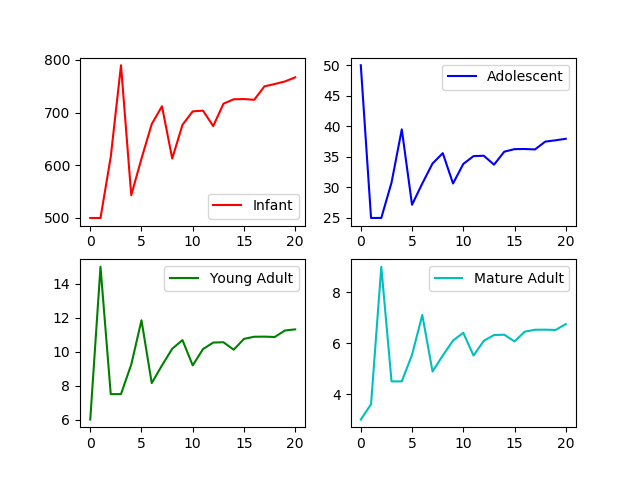

In [14]:
import pylab as plt
L = array([[0,4,20,60], [0.05,0,0,0], [0,0.3,0,0], [0,0,0.6,0]])
t0 = array([[0]])
x0 = array([[500],[50],[6],[3]])
x1 = L@x0
t1 = array([[1]])

x = hstack((x0,x1))
t = hstack((t0,t1))

for i in range(2,21):
    
    x1 = L@x1
    x = hstack((x,x1))
    t = hstack((t, array([[i]])))


infant = vstack((x[0,:]))
adolescent = vstack((x[1,:]))
ya = vstack((x[2,:]))
ma = vstack((x[3,:]))

plt.subplot(2,2,1)
plt.plot(infant, 'r', label = 'Infant')
plt.legend()

plt.subplot(2,2,2)
plt.plot(adolescent, 'b', label = 'Adolescent')
plt.legend()

plt.subplot(2,2,3)
plt.plot(ya,'g', label = 'Young Adult')
plt.legend()

plt.subplot(2,2,4)
plt.plot(ma,'c', label = 'Mature Adult')
plt.legend()




In [32]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

population = array([[500],[50],[6],[3]])
infant = population[0,:]
adolescent = population[1,:]
ya = population[2,:]
ma = population[3,:]



L = array([[0,4,20,60], [0.05,0,0,0], [0,0.3,0,0], [0,0,0.6,0]])
t0 = array([[0],[0],[0],[0]])
x0 = array([[500],[50],[6],[3]])
x1 = L@x0
t1 = array([[1],[1],[1],[1]])
x = [x0]
t = [t0]

x.append(x1)
t.append(t1)
for i in range(2,21):
    x1 = L@x1
    t1 = np.array([[i],[i],[i],[i]])
    x.append(x1)
    t.append(t1)

<IPython.core.display.Javascript object>


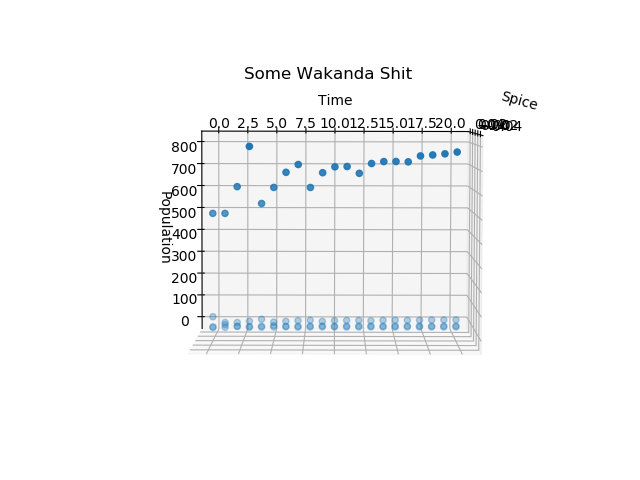

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Population')
ax.set_ylabel('Time')
ax.set_zlabel('Spice')
ax.set_title('Some Wakanda Shit')
ax.scatter(x,t)

#we wakanda up in dis bich

▶ **CHECKPOINT 1**

To analyse the long-term prognosis for this population, we turn to the eigenvalues of the Leslie matrix. The dominant eigenvalue that determines the population in the long term will be the one with the greatest magnitude. If its magnitude is greater than 1, there will be exponential growth, but if it is less than one then this will become exponential decay.

**Calculate the eigenvalues and eigenvectors of this matrix. Calculate the magnitudes of the eigenvalues** (the `abs` function will do). Hence **identify the eigenvector responsible for the long-term behaviour of this system.**

In [18]:
eigenvalues, eigenvectors = eig(L)

print(eig(L))

print('\n', vstack(abs(eigenvalues)))
print('\n', vstack(eigenvectors))

(array([ 1.01187148+0.j        , -0.80892876+0.j        ,
       -0.10147136+0.80586677j, -0.10147136-0.80586677j]), array([[-0.99863691+0.j        , -0.99769051+0.j        ,
         0.99771358+0.j        ,  0.99771358-0.j        ],
       [-0.04934603+0.j        ,  0.06166739+0.j        ,
        -0.00767293-0.06093699j, -0.00767293+0.06093699j],
       [-0.01463013+0.j        , -0.02287002+0.j        ,
        -0.02197691+0.00562364j, -0.02197691-0.00562364j],
       [-0.00867509+0.j        ,  0.01696319+0.j        ,
         0.00614984+0.01558832j,  0.00614984-0.01558832j]]))

 [[1.01187148]
 [0.80892876]
 [0.81223007]
 [0.81223007]]

 [[-0.99863691+0.j         -0.99769051+0.j          0.99771358+0.j
   0.99771358-0.j        ]
 [-0.04934603+0.j          0.06166739+0.j         -0.00767293-0.06093699j
  -0.00767293+0.06093699j]
 [-0.01463013+0.j         -0.02287002+0.j         -0.02197691+0.00562364j
  -0.02197691-0.00562364j]
 [-0.00867509+0.j          0.01696319+0.j          0.0061

**What is the long-term population distribution** – that is, for every mature adult, how many young adults, adolescents, and juveniles would you expect? **Do your results match your 20-year calculation above?** 

(Your answers should of course be real, but feel free to use the `.real` property to get rid of the `+0j`s if they're irritating you!)

In [19]:
a = (eigenvectors[:,0]/eigenvectors[-1,0]).real

print(a[0]*6.74933259)
print(a[1]*6.74933259)
print(a[2]*6.74933259)
print(a[3]*6.74933259)

# [6.74933259]
# [11.31443162]
# [37.96048244]
# [766.99930064]

776.9523513791697
38.39184951719894
11.38242858832873
6.74933259


**Plot a graph of the dominant eigenvalue as a function of the infant survival rate** (*i.e.*, the `[1,0]` element of the Leslie matrix) **over a range just below its initial value of 0.05. How far can this number fall before this animal is at risk of extinction?**

0.05


<IPython.core.display.Javascript object>


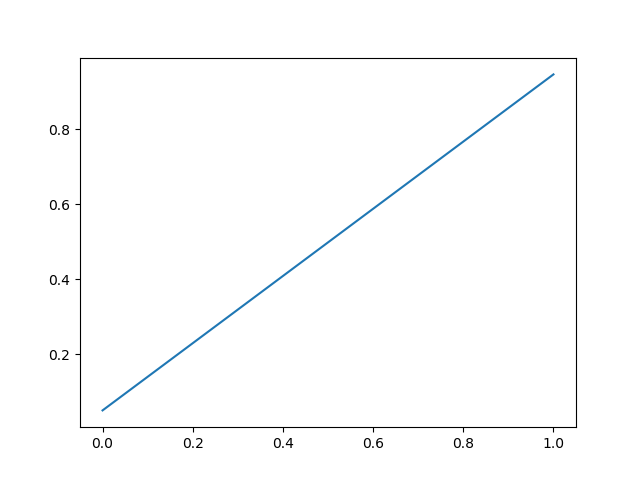

J:\Physics\Teaching\spa5666\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [31]:
L[1,0] = 0.05
print(L[1,0])
points = [L[1,0]]
t = [0,1]
while max(eigenvalues) >= 1:
    L[1,0] = L[1,0] - 0.01
    
    eigenvalues, eigenvectors = eig(L)
    print(max(eigenvalues))
points.append(max(eigenvalues))

plt.plot(t,points)

▶ **CHECKPOINT 2**

## A physics example: normal modes of vibrating molecules

As we saw in class, when the force on some object depends linearly on the positions of *other* objects, we can write the equations of motion as a single matrix equation. This is very often the case for the motion of chemically bonded atoms. For instance, consider a molecule of carbon dioxide:

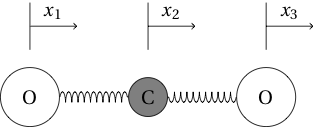

As the diagram suggests, we model this as three point masses connected by ideal springs. The C atom has mass $m$, the O atoms mass $M$, and the bonds have spring constant $J$. Then the equations of motion are

$$
\begin{align*}
M\ddot{x}_1 &= -J(x_1 - x_2) \\
m\ddot{x}_2 &= -J(x_2 - x_1) - J(x_2 - x_3)\\
M\ddot{x}_3 &= -J(x_3 - x_2) \\
\end{align*}
$$

Let's write this as a matrix equation, $\ddot{\mathbf{x}} = -\mathbf{A}\mathbf{x}$. Then, if $\mathbf{x}$ is an eigenvector of $\mathbf{A}$ with positive eigenvalue $\lambda$, $\ddot{\mathbf{x}} = -\mathbf{A}\mathbf{x} = -\lambda\mathbf{x}$ and we have the equation for simple harmonic motion with frequency $\sqrt{\lambda}$.

**Convert these equations to a matrix equation of the form above. Find $\mathbf{A}$ and its eigenvectors and eigenvalues.** Take the mass of the oxygen atom to be $M = 16$ and of the carbon atom to be $m = 12$.

*Hint*: you can just set $J = 1$ since this is a common factor in the equation.

In [4]:
M= 16/12
matrix1 = array([[1,-1,0],[-1*M,2*M,-1*M],[0,-1,1]])
print(eig(matrix1))

(array([3.66666667e+00, 1.00000000e+00, 1.00429348e-16]), array([[ 3.31294578e-01,  7.07106781e-01,  5.77350269e-01],
       [-8.83452209e-01,  1.48766011e-16,  5.77350269e-01],
       [ 3.31294578e-01, -7.07106781e-01,  5.77350269e-01]]))


**Sketch the motion of the atoms corresponding to each of the eigenvectors** (that is, draw three copies of the molecule, in each case with each atom displaced in the correct direction according to the corresponding eigenvector). **Do their corresponding eigenvalues make sense?**

**In the same way, calculate the normal modes for the linear, tetratomic molecule $\mathrm{OCCO}$.**

(For simplicity, take the C–O and C–C spring constants to be the same. In practice, of course, this will not be the case!)

In [5]:
matrix2 = array([[1, -1, 0, 0],[ -1*M, 2*M, -1*M, 0],[ 0, -1*M, 2*M, -1*M],[0, 0, -1, 1]])
print(eig(matrix2))

(array([4.39296945e+00, 2.33333333e+00, 1.71813739e-16, 6.07030551e-01]), array([[-0.19990214, -0.42426407, -0.5       , -0.65811554],
       [ 0.67826185,  0.56568542, -0.5       , -0.2586193 ],
       [-0.67826185,  0.56568542, -0.5       ,  0.2586193 ],
       [ 0.19990214, -0.42426407, -0.5       ,  0.65811554]]))


▶ **CHECKPOINT 3**